## GPU 드라이버 확인

In [1]:
!nvidia-smi

Mon Sep 12 11:27:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 516.94       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:09:00.0  On |                  N/A |
|  0%   46C    P0    40W / 200W |   1691MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Mon_May__3_19:15:13_PDT_2021
Cuda compilation tools, release 11.3, V11.3.109
Build cuda_11.3.r11.3/compiler.29920130_0


## TensorFlow

In [3]:
import tensorflow as tf

print(f'tf.__version__: {tf.__version__}')

gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

tf.__version__: 2.6.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2022-09-12 11:27:48.713514: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-12 11:27:48.720554: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-12 11:27:48.720701: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.


## PyTorch

In [4]:
import torch

print(f'torch.__version__: {torch.__version__}')

print(f'GPU 사용여부: {torch.cuda.is_available()}')
gpu_count = torch.cuda.device_count()
print(f'GPU count: {gpu_count}')
if gpu_count > 0:
    print(f'GPU name: {torch.cuda.get_device_name(0)}')

torch.__version__: 1.12.1+cu102
GPU 사용여부: True
GPU count: 1
GPU name: NVIDIA GeForce RTX 3060 Ti


/opt/conda/envs/py37/lib/python3.7/site-packages/torch/cuda/__init__.py:146: UserWarning: 
NVIDIA GeForce RTX 3060 Ti with CUDA capability sm_86 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_70.
If you want to use the NVIDIA GeForce RTX 3060 Ti GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


## 한글 자연어 처리 패키지

In [4]:
from konlpy.tag import Okt, Kkma, Hannanum

sample_sentence = '아버지가방에들어가신다.'

okt = Okt()
print(f'okt: {okt.pos(sample_sentence)}')

kkma = Kkma()
print(f'kkma: {okt.pos(sample_sentence)}')

hannanum = Hannanum()
print(f'hannanum: {hannanum.pos(sample_sentence)}')

okt: [('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb'), ('.', 'Punctuation')]
kkma: [('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb'), ('.', 'Punctuation')]
hannanum: [('아버지가방에들어가', 'N'), ('이', 'J'), ('시ㄴ다', 'E'), ('.', 'S')]


## Mecab 추가 설치 확인

In [5]:
from konlpy.tag import Mecab

sample_sentence = '아버지가방에들어가신다.'

mecab = Mecab()
print(f'mecab: {mecab.pos(sample_sentence)}')

mecab: [('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('신다', 'EP+EF'), ('.', 'SF')]


## 머신러닝 패키지 확인

In [6]:
import sklearn
import lightgbm
import xgboost

print(f'lightgbm: {lightgbm.__version__}\nxgboost: {xgboost.__version__}\nsklearn: {sklearn.__version__}')

lightgbm: 3.3.2
xgboost: 2.0.0-dev
sklearn: 1.0.2


## 한글 폰트 시각화 확인

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

print(f'matplotlib: {matplotlib.__version__}')
print(f'pandas: {pd.__version__}')

# Unicode warning 제거 (폰트 관련 경고메시지)
plt.rcParams['axes.unicode_minus']=False

# 그래프 출력 사이즈 설정
plt.rcParams["figure.figsize"] = (10, 6)

matplotlib: 3.5.3
pandas: 1.2.5


findfont: Font family ['D2Coding'] not found. Falling back to DejaVu Sans.
/opt/conda/envs/py37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/py37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/py37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54256 (\N{HANGUL SYLLABLE PON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/py37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/py37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYL

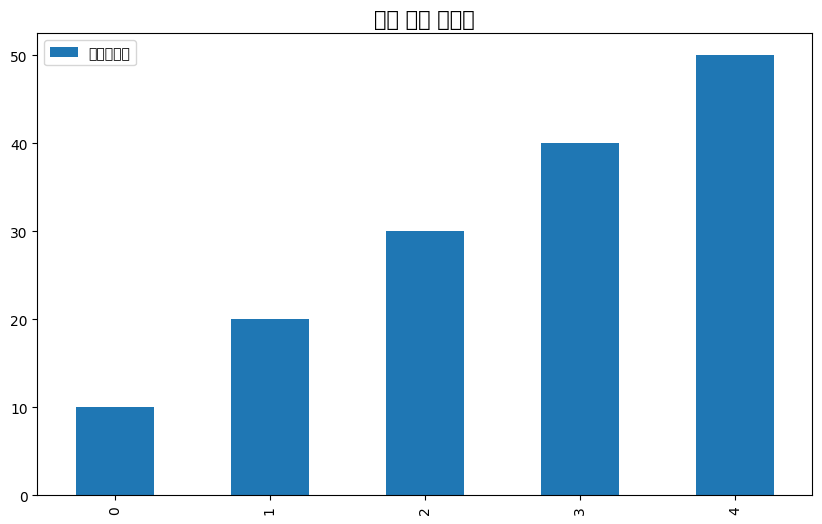

In [8]:
# D2Coding
plt.rcParams['font.family'] = "D2Coding"
data = {
    '한글테스트': [10, 20, 30, 40, 50]
}
pd.DataFrame(data).plot(kind='bar')
plt.title('한글 폰트 테스트', fontsize=15)
plt.show()

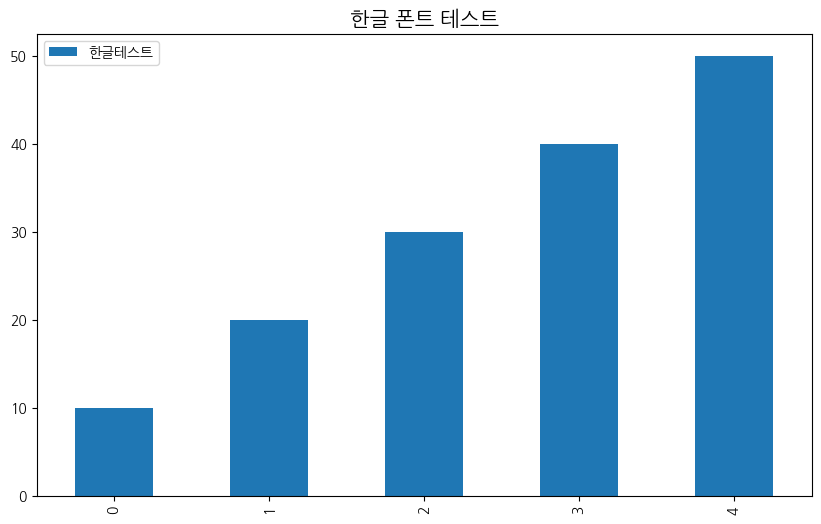

In [9]:
# NanumGothic
plt.rcParams['font.family'] = "NanumGothic"
data = {
    '한글테스트': [10, 20, 30, 40, 50]
}
pd.DataFrame(data).plot(kind='bar')
plt.title('한글 폰트 테스트', fontsize=15)
plt.show()

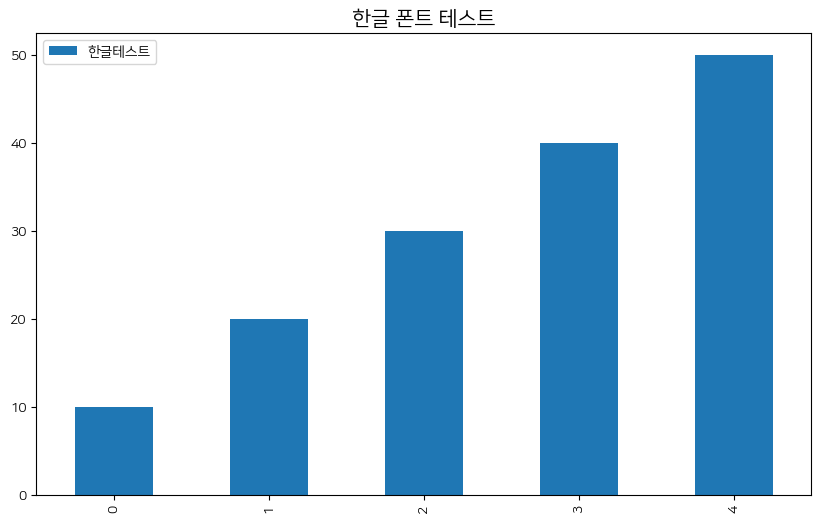

In [10]:
# NanumSquare
plt.rcParams['font.family'] = "NanumSquare"
data = {
    '한글테스트': [10, 20, 30, 40, 50]
}
pd.DataFrame(data).plot(kind='bar')
plt.title('한글 폰트 테스트', fontsize=15)
plt.show()

## XGBoost CPU & GPU 학습시간 비교

In [11]:
import time
from sklearn.datasets import make_regression
from xgboost import XGBRegressor

def model_test(model_name, model):
    x, y = make_regression(n_samples=100000, n_features=100)
    
    start_time = time.time()
    model.fit(x, y)
    end_time = time.time()
    return f'{model_name}: 소요시간: {(end_time - start_time)} 초'

xgb = XGBRegressor(n_estimators=1000, 
                   learning_rate=0.01, 
                   subsample=0.8, 
                   colsample_bytree=0.8,
                   objective='reg:squarederror', 
                  )

print(model_test('xgb (cpu)', xgb))

xgb = XGBRegressor(n_estimators=1000, 
                   learning_rate=0.01, 
                   subsample=0.8, 
                   colsample_bytree=0.8,
                   objective='reg:squarederror', 
                   tree_method='gpu_hist')

print(model_test('xgb (gpu)', xgb))

KeyboardInterrupt: 

## 기타 패키지 출력

In [ ]:
!pip list

In [12]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
